<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/logo.png" width="100"/>

# Workshop: Introduction to Deep Learning

## Learning Objectives
- create a fully-connected neural network architecture
- apply neural nets to two classic ML problems: regression and classification
- train neural nets with stochastic gradient descent
- improve performance with dropout, batch normalization, and other techniques

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*First* create a shortcut to [this](https://drive.google.com/drive/folders/1dNGY4E4wdlSpq5IvSchaUSAkcT1-T9t8?usp=sharing) folder in your drive. Then, we'll cd into it.

In [ ]:
cd content/drive/MyDrive/Workshop\ 5\ -\ DL

/content/drive/.shortcut-targets-by-id/1dNGY4E4wdlSpq5IvSchaUSAkcT1-T9t8/Workshop 5 - DL


## What is Deep Learning

Some of the most impressive advances in artificial intelligence in recent years have been in the field of deep learning. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.

So what is deep learning? **Deep learning** is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

Through their power and scalability **neural networks** have become the defining model of deep learning. Neural networks are composed of neurons, where each neuron individually performs only a simple computation. The power of a neural network comes instead from the complexity of the connections these neurons can form.

## The Linear Unit

So let's begin with the fundamental component of a neural network: the individual neuron. As a diagram, a **neuron** (or **unit**) with one input looks like:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/mfOlDR6.png" width="250" alt="Diagram of a linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>The Linear Unit: $y = w x + b$
</center></figcaption>
</figure>

The input is `x`. Its connection to the neuron has a **weight** which is `w`. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input `x`, what reaches the neuron is `w * x`. A neural network "learns" by modifying its weights.

The `b` is a special kind of weight we call the **bias**. The bias doesn't have any input data associated with it; instead, we put a `1` in the diagram so that the value that reaches the neuron is just `b` (since `1 * b = b`). The bias enables the neuron to modify the output independently of its inputs.

The `y` is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is `y = w * x + b`, or as a formula 𝑦 = 𝑤𝑥 + 𝑏.

## Linear Units in Keras

The easiest way to create a model in Keras is through `keras.Sequential`, which creates a neural network as a stack of *layers*.

We could define a simple linear model accepting three input features and producing a single output like so:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

## Layers

Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of inputs we get a dense layer.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/2MA4iMV.png" width="300" alt="A stack of three circles in an input layer connected to two circles in a dense layer.">
<figcaption style="textalign: center; font-style: italic"><center>A dense layer of two linear units receiving two inputs and a bias.
</center></figcaption>
</figure>

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

## The Activation Function

It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something *nonlinear*. What we need are activation functions.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/OLSUEYT.png" width="400" alt=" ">
<figcaption style="textalign: center; font-style: italic"><center>Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions. 
</center></figcaption>
</figure>

An **activation function** is simply some function we apply to each of a layer's outputs (its *activations*). The most common is the *rectifier* function $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/aeIyAlF.png" width="400" alt="A graph of the rectifier function. The line y=x when x>0 and y=0 when x<0, making a 'hinge' shape like '_/'.">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a *bend* in the data, moving us away from simple lines.

When we attach the rectifier to a linear unit, we get a **rectified linear unit** or **ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".)  Applying a ReLU activation to a linear unit means the output becomes `max(0, w * x + b)`, which we might draw in a diagram like:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eFry7Yu.png" width="250" alt="Diagram of a single ReLU. Like a linear unit, but instead of a '+' symbol we now have a hinge '_/'. ">
<figcaption style="textalign: center; font-style: italic"><center>A rectified linear unit.
</center></figcaption>
</figure>

The usual way of attaching an activation function to a `Dense` layer is to include it as part of the definition with the `activation` argument. Sometimes though you'll want to put some other layer between the `Dense` layer and its activation function. (We'll see an example of this in Lesson 5 with *batch normalization*.) In this case, we can define the activation in its own `Activation` layer, like so:

```
layers.Dense(units=8),
layers.Activation('relu')
```

This is completely equivalent to the ordinary way: `layers.Dense(units=8, activation='relu')`.

### Alternatives to ReLU

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from `'relu'` to one of the others named above. Then run the cell to see the graph. (Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

## Stacking Dense Layers

Now that we have some nonlinearity, let's see how we can stack layers to get complex data transformations.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/Y5iwFQZ.png" width="450" alt="An input layer, two hidden layers, and a final linear layer.">
<figcaption style="textalign: center; font-style: italic"><center>A stack of dense layers makes a "fully-connected" network.
</center></figcaption>
</figure>

The layers before the output layer are sometimes called **hidden** since we never see their outputs directly.

Now, notice that the final (output) layer is a linear unit (meaning, no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. Other tasks (like classification) might require an activation function on the output.

### Building Sequential Models ##

The `Sequential` model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output. This creates the model in the figure above:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

Be sure to pass all the layers together in a list, like `[layer, layer, layer, ...]`, instead of as separate arguments. To add an activation function to a layer, just give its name in the `activation` argument.

In [ ]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1)
])

## The Loss Function

We've seen how to design an architecture for a network, but we haven't seen how to tell a network *what* problem to solve. This is the job of the loss function.

The **loss function** measures the disparity between the the target's true value and the value the model predicts. 

Different problems call for different loss functions. We have been looking at **regression** problems, where the task is to predict some numerical value -- calories in *80 Cereals*, rating in *Red Wine Quality*. Other regression tasks might be predicting the price of a house or the fuel efficiency of a car.

A common loss function for regression problems is the **mean absolute error** or **MAE**. For each prediction `y_pred`, MAE measures the disparity from the true target `y_true` by an absolute difference `abs(y_true - y_pred)`.

The total MAE loss on a dataset is the mean of all these absolute differences.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/VDcvkZN.png" width="500" alt="A graph depicting error bars from data points to the fitted line..">
<figcaption style="textalign: center; font-style: italic"><center>The mean absolute error is the average length between the fitted curve and the data points.
</center></figcaption>
</figure>

Besides MAE, other loss functions you might see for regression problems are the mean-squared error (MSE) or the Huber loss (both available in Keras).

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

# The Optimizer - Stochastic Gradient Descent #

We've described the problem we want the network to solve, but now we need to say *how* to solve it. This is the job of the **optimizer**. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called **stochastic gradient descent**. They are iterative algorithms that train a network in steps. One **step** of training goes like this:
1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

<figure style="padding: 1em;">
<img src="https://i.imgur.com/rFI1tIk.gif" width="1600" alt="Fitting a line batch by batch. The loss decreases and the weights approach their true values.">
<figcaption style="textalign: center; font-style: italic"><center>Training a neural network with Stochastic Gradient Descent.
</center></figcaption>
</figure>

Each iteration's sample of training data is called a **minibatch** (or often just "batch"), while a complete round of the training data is called an **epoch**. The number of epochs you train for is how many times the network will see each training example.

The animation shows the linear model from Lesson 1 being trained with SGD. The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (`w` the slope and `b` the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

## Learning Rate and Batch Size ##

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the **learning rate**. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. **Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

## Adding the Loss and Optimizer ##

After defining a model, you can add a loss function and optimizer with the model's `compile` method:

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

Notice that we are able to specify the loss and optimizer with just a string. You can also access these directly through the Keras API -- if you wanted to tune parameters, for instance -- but for us, the defaults will work fine.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. How well can we predict a wine's perceived quality from these measurements?

First, run the next cell to display the first few rows of this dataset.

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index) # validation set becomes dataframe - trainingset
display(df_train.head(4)) #displays the first few entries in the training set

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

You can get the number of rows and columns of a dataframe (or a Numpy array) with the `shape` attribute.

The `input_shape` parameter for a Keras model on this task should be equivalent to the number of features.

In [ ]:
X_train.shape

(1119, 11)

Now we will define a linear model appropriate for this task. Pay attention to how many inputs and outputs the model should have. Eleven columns means eleven inputs.

We've chosen a three-layer network with over 1500 neurons. This network should be capable of learning fairly complex relationships in the data.

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

After defining the model, we compile in the optimizer and loss function.

In [ ]:
model.compile(
    optimizer="adam",
    loss="mae",
)

Now we're ready to start training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the `batch_size`) and to do that 10 times all the way through the dataset (the `epochs`).

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 130ms/step - loss: 0.3319 - val_loss: 0.1377
Epoch 2/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1391 - val_loss: 0.1269
Epoch 3/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1300 - val_loss: 0.1209
Epoch 4/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1212 - val_loss: 0.1115
Epoch 5/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1129 - val_loss: 0.1201
Epoch 6/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1143 - val_loss: 0.1043
Epoch 7/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1044 - val_loss: 0.1085
Epoch 8/10
5/5 [==============================] - 0s 38ms/step - loss: 0.1053 - val_loss: 0.1013
Epoch 9/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1027 - val_loss: 0.1005
Epoch 10/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1016 - val_loss: 0.1011


You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The `fit` method in fact keeps a record of the loss produced during training in a `History` object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

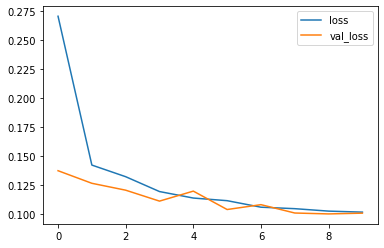

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method to display loss and validation loss through each epoch
history_df.loc[:,['loss','val_loss']].plot();

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.

## Overfitting and Underfitting

There's more to the world of deep learning than just dense layers. There are dozens of kinds of layers you might add to a model. (Try browsing through the [Keras docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/) for a sample!) Some are like dense layers and define connections between neurons, and others can do preprocessing or transformations of other sorts.

We'll cover two kinds of special layers, not containing any neurons themselves, but that add some functionality that can sometimes benefit a model in various ways. Both are commonly used in modern architectures.

## Dropout

The first of these is the "dropout layer", which can help correct overfitting.

In the last lesson we talked about how overfitting is caused by the network learning spurious patterns in the training data. To recognize these spurious patterns a network will often rely on very a specific combinations of weight, a kind of "conspiracy" of weights. Being so specific, they tend to be fragile: remove one and the conspiracy falls apart.

This is the idea behind **dropout**. To break up these conspiracies, we randomly *drop out* some fraction of a layer's input units every step of training, making it much harder for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/a86utxY.gif" width="600" alt="An animation of a network cycling through various random dropout configurations.">
<figcaption style="textalign: center; font-style: italic"><center>Here, 50% dropout has been added between the two hidden layers.</center></figcaption>
</figure>

You could also think about dropout as creating a kind of *ensemble* of networks. The predictions will no longer be made by one big network, but instead by a committee of smaller networks. Individuals in the committee tend to make different kinds of mistakes, but be right at the same time, making the committee as a whole better than any individual. (If you're familiar with random forests as an ensemble of decision trees, it's the same idea.)

### Adding Dropout

In Keras, the dropout rate argument `rate` defines what percentage of the input units to shut off. Put the `Dropout` layer just before the layer you want the dropout applied to:

```
keras.Sequential([
    # ...
    layer.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layer.Dense(16),
    # ...
])
```

## Batch Normalization

The next special layer we'll look at performs "batch normalization" (or "batchnorm"), which can help correct training that is slow or unstable.

With neural networks, it's generally a good idea to put all of your data on a common scale, perhaps with something like scikit-learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) or [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). The reason is that SGD will shift the network weights in proportion to how large an activation the data produces. Features that tend to produce activations of very different sizes can make for unstable training behavior.

Now, if it's good to normalize the data before it goes into the network, maybe also normalizing inside the network would be better! In fact, we have a special kind of layer that can do this, the **batch normalization layer**. A batch normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.

Most often, batchnorm is added as an aid to the optimization process (though it can sometimes also help prediction performance). Models with batchnorm tend to need fewer epochs to complete training. Moreover, batchnorm can also fix various problems that can cause the training to get "stuck". Consider adding batch normalization to your models, especially if you're having trouble during training.

### Adding Batch Normalization

It seems that batch normalization can be used at almost any point in a network. You can put it after a layer...

```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

... or between a layer and its activation function:

```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

And if you add it as the first layer of your network it can act as a kind of adaptive preprocessor, standing in for something like Sci-Kit Learn's `StandardScaler`.

## Example - Using Dropout and Batch Normalization

Let's continue developing the *Red Wine* model. Now we'll increase the capacity even more, but add dropout to control overfitting and batch normalization to speed up optimization. This time, we'll also leave off standardizing the data, to demonstrate how batch normalization can stabalize the training.

Whan adding dropout, you may need to increase the number of units in your `Dense` layers.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

There's nothing to change this time in how we set up the training.

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

You'll typically get better performance if you standardize your data before using it for training. That we were able to use the raw data at all, however, shows how effective batch normalization can be on more difficult datasets.